<a href="https://colab.research.google.com/github/KasiBaskerLaxmanan/pyalgotrading/blob/master/Pandas_Adv02_basic_stats_filtering_nans_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [0]:
### Data transformation from previous notebooks
nyc = pd.read_csv('/content/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

# Basic Stats

A nice feature of pandas is that you can quickly inspect data and get summary statistics.

In [5]:
# The describe method gives us basic stats. The result is a Data Frame
nyc.describe()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3275.000000,3275.000000,3275.000000,3277.000000,3277.000000,3277.000000,3245.000000,3244.000000,3177.000000,3286.000000,3277.000000,3285.000000
mean,62.930898,56.042314,48.701674,47.334855,41.676712,35.374125,78.707458,62.108676,45.009132,30.113740,30.006202,29.900043,9.939274,8.663717,6.523955,14.487827,5.826449,22.755430,0.148832,3.231614,193.028919
std,18.006236,16.953644,16.303976,17.901201,18.706095,19.586057,15.652513,14.548359,15.901280,0.209992,0.222218,0.239583,0.406343,2.041796,3.910295,4.355743,2.996004,7.064674,0.432399,2.745582,104.107605
min,16.000000,12.000000,4.000000,-8.000000,-12.000000,-16.000000,28.000000,20.000000,6.000000,29.260000,28.840000,28.530000,5.000000,1.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,-1.000000
25%,48.000000,42.000000,36.000000,34.000000,27.000000,20.000000,67.000000,51.000000,34.000000,29.970000,29.870000,29.760000,10.000000,8.000000,2.000000,12.000000,4.000000,18.000000,0.000000,1.000000,78.000000
50%,64.000000,57.000000,49.000000,50.000000,43.000000,36.000000,80.000000,62.000000,43.000000,30.100000,30.010000,29.910000,10.000000,10.000000,9.000000,14.000000,5.000000,22.000000,0.000000,3.000000,236.000000
75%,79.000000,71.000000,63.000000,63.000000,58.000000,52.000000,93.000000,73.000000,54.000000,30.250000,30.150000,30.060000,10.000000,10.000000,10.000000,17.000000,7.000000,26.000000,0.050000,6.000000,279.000000
max,104.000000,94.000000,84.000000,77.000000,75.000000,72.000000,100.000000,97.000000,93.000000,30.770000,30.690000,30.590000,10.000000,10.000000,10.000000,99.000000,99.000000,137.000000,7.570000,8.000000,360.000000


In [8]:
# Remember transpose
nyc.describe().T


,count,mean,std,min,25%,50%,75%,max
Max_TemperatureF,3285.0,62.930898,18.006236,16.00,48.00,64.00,79.00,104.00
Mean_TemperatureF,3285.0,56.042314,16.953644,12.00,42.00,57.00,71.00,94.00
Min_TemperatureF,3285.0,48.701674,16.303976,4.00,36.00,49.00,63.00,84.00
Max_Dew_PointF,3285.0,47.334855,17.901201,-8.00,34.00,50.00,63.00,77.00
MeanDew_PointF,3285.0,41.676712,18.706095,-12.00,27.00,43.00,58.00,75.00
Min_DewpointF,3285.0,35.374125,19.586057,-16.00,20.00,36.00,52.00,72.00
Max_Humidity,3285.0,78.707458,15.652513,28.00,67.00,80.00,93.00,100.00
Mean_Humidity,3285.0,62.108676,14.548359,20.00,51.00,62.00,73.00,97.00
Min_Humidity,3285.0,45.009132,15.901280,6.00,34.00,43.00,54.00,93.00
Max_Sea_Level_PressureIn,3275.0,30.113740,0.209992,29.26,29.97,30.10,30.25,30.77


In [9]:
# to view non-numeric data pass include='all'
nyc.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
EST,3287,3287,2007-09-10,1,2006-01-01,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,62.9309,18.0062,16,48,64,79,104
Mean_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,56.0423,16.9536,12,42,57,71,94
Min_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,48.7017,16.304,4,36,49,63,84
Max_Dew_PointF,3285,NaN,NaT,NaN,NaT,NaT,47.3349,17.9012,-8,34,50,63,77
MeanDew_PointF,3285,NaN,NaT,NaN,NaT,NaT,41.6767,18.7061,-12,27,43,58,75
Min_DewpointF,3285,NaN,NaT,NaN,NaT,NaT,35.3741,19.5861,-16,20,36,52,72
Max_Humidity,3285,NaN,NaT,NaN,NaT,NaT,78.7075,15.6525,28,67,80,93,100
Mean_Humidity,3285,NaN,NaT,NaN,NaT,NaT,62.1087,14.5484,20,51,62,73,97
Min_Humidity,3285,NaN,NaT,NaN,NaT,NaT,45.0091,15.9013,6,34,43,54,93


In [10]:
# Various aggregation methods (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
nyc.Max_Humidity.max()

100.0

In [11]:
nyc.Max_Humidity.quantile(.2)

64.0

In [12]:
nyc.Max_Humidity.quantile([.2,.3])

0.2    64.0
0.3    70.0
Name: Max_Humidity, dtype: float64

In [13]:
nyc.Max_Humidity.min()

28.0

In [14]:
nyc.Mean_Humidity.corr(nyc.Mean_TemperatureF)

0.255606399799407

## Basic Stats Assignment

* *Describe* the data
* Choose a column
  * Print out the max, min, and mean
* Correlate (``corr``) the temperature column with the date column

In [7]:
%timeit
# Data transformation from previous notebook
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/el_nino-mld/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])
nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237
pd.to_datetime(nino.date, format='%y%m%d')
nino = nino.drop('obs', axis=1)
nino.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year_month_day  178080 non-null  datetime64[ns]
 1   date            178080 non-null  int64         
 2   latitude        178080 non-null  float64       
 3   longitude       178080 non-null  float64       
 4   zon_winds       152917 non-null  float64       
 5   mer_winds       152918 non-null  float64       
 6   humidity        112319 non-null  float64       
 7   air_temp_       159843 non-null  float64       
 8   s_s_temp_       161073 non-null  float64       
 9   air_temp_F      159843 non-null  float64       
 10  zon_winds_mph   152917 non-null  float64       
 11  mer_winds_mph   152918 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 16.3 MB


In [8]:
nino.describe().T

,count,mean,std,min,25%,50%,75%,max
date,178080.0,933689.455374,33900.474320,800307.0000,920116.0000,940601.0000,960617.0000,980623.0000
latitude,178080.0,0.473626,4.583041,-8.8100,-2.0100,0.0100,4.9800,9.0500
longitude,178080.0,-54.025233,135.363994,-180.0000,-154.9500,-111.2600,147.0100,171.0800
zon_winds,152917.0,-3.304772,3.373492,-12.4000,-5.8000,-4.0000,-1.4000,14.3000
mer_winds,152918.0,0.249762,2.999202,-11.6000,-1.7000,0.3000,2.3000,13.0000
humidity,112319.0,81.236525,5.313061,45.4000,77.7000,81.2000,84.8000,99.9000
air_temp_,159843.0,26.887567,1.816429,17.0500,26.0600,27.3400,28.1800,31.6600
s_s_temp_,161073.0,27.715309,2.057428,17.3500,26.7700,28.2900,29.2300,31.2600
air_temp_F,159843.0,80.397620,3.269572,62.6900,78.9080,81.2120,82.7240,88.9880
zon_winds_mph,152917.0,-7.392775,7.546501,-27.7388,-12.9746,-8.9480,-3.1318,31.9891


In [9]:
nino.humidity.agg([np.min, np.max, np.mean])

amin    45.400000
amax    99.900000
mean    81.236525
Name: humidity, dtype: float64

In [10]:
nino.humidity.agg(['min', 'max', 'mean'])

min     45.400000
max     99.900000
mean    81.236525
Name: humidity, dtype: float64

In [11]:
nino.humidity.apply(['min', 'max', 'mean'])

min     45.400000
max     99.900000
mean    81.236525
Name: humidity, dtype: float64

In [12]:
nino.date.corr(nino.air_temp_)

0.26539437797168147

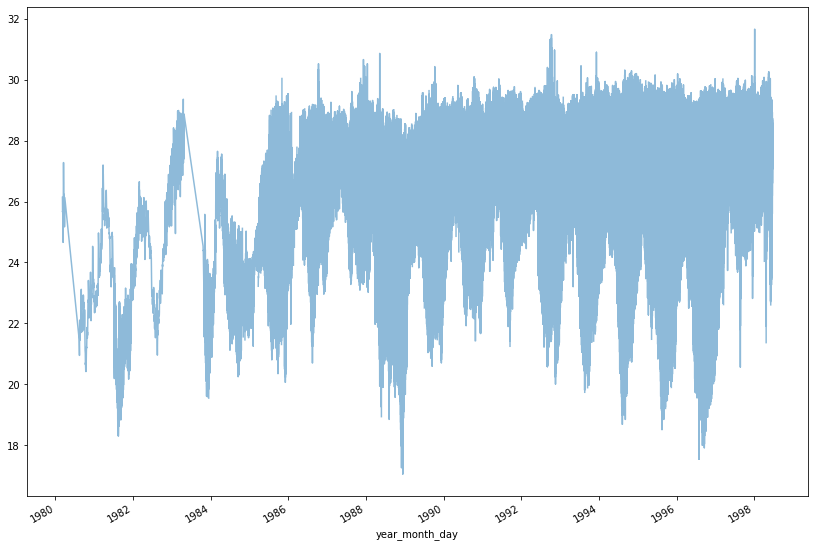

In [13]:
# Bonus - Visualization of correlation
nino.set_index('year_month_day').air_temp_.plot(figsize=(14,10), alpha=.5) #plot(kind='scatter', x='year_month_day', y='air_temp_')

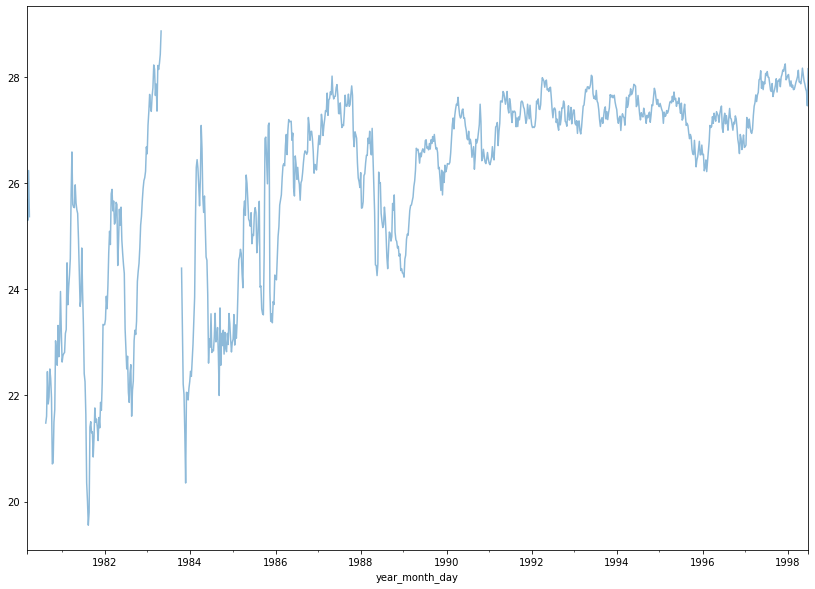

In [16]:
# Resample to see more clear
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliasescv
# (.resample returns a groupby so we need to call median on the air_temp_ column)
(nino
 .set_index('year_month_day')
 .resample('W')
 .air_temp_
 .median()
 .plot(figsize=(14,10), alpha=.5) # Alpha lets you see thru the scatter or plot
 ) 
#

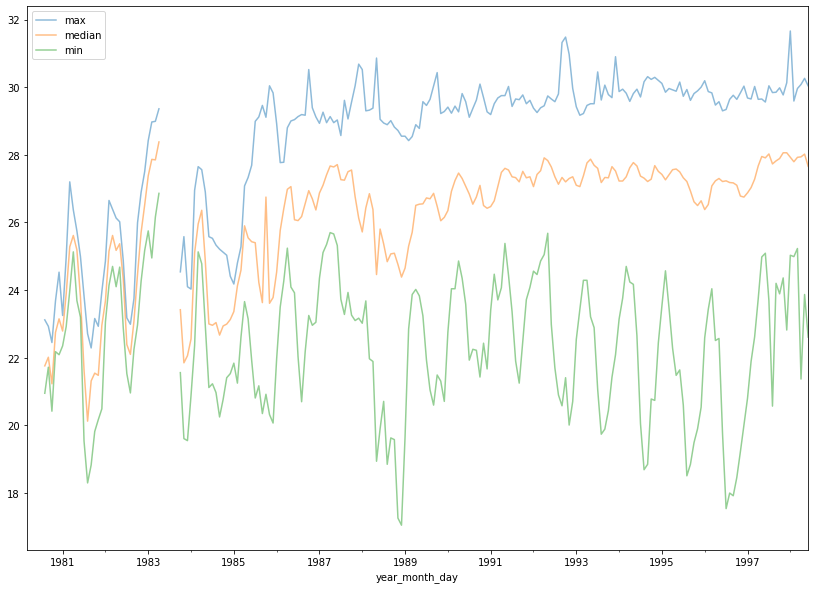

In [18]:
# Resample to see more clear
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliasescv
# (.resample returns a groupby so we need to call median on the air_temp_ column)
(nino
 .set_index('year_month_day')
 .resample('M')
 .air_temp_
 .agg(['max', 'median', 'min'])
 .plot(figsize=(14,10), alpha=.5)
 ) #

## Basic Stats Extra
* use the ``scatter_matrix`` function in ``pandas.plotting`` to create a correlation matrix (note this might take tens of seconds to run)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112c9ad68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d847940>]], dtype=object)

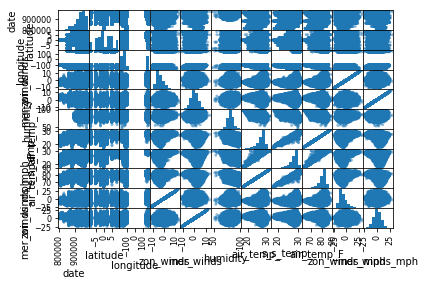

In [0]:
pd.plotting.scatter_matrix(nino)

# Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

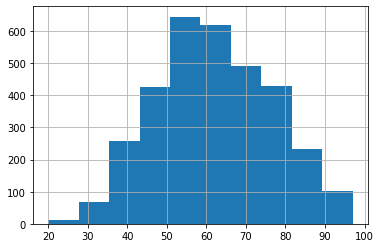

In [19]:
# histograms are a quick way to visualize the distribution
nyc.Mean_Humidity.hist()

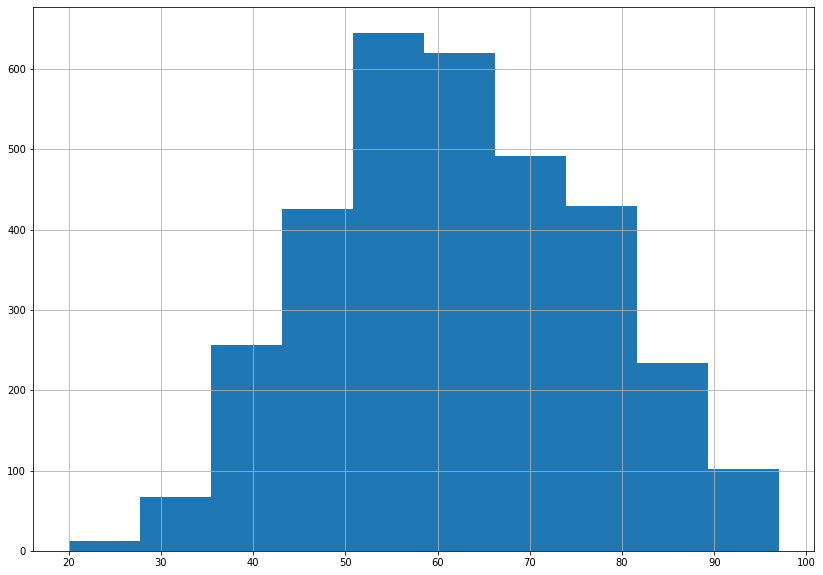

In [20]:
# add in figsize=(width,height) to boost size
nyc.Mean_Humidity.hist(figsize=(14, 10))

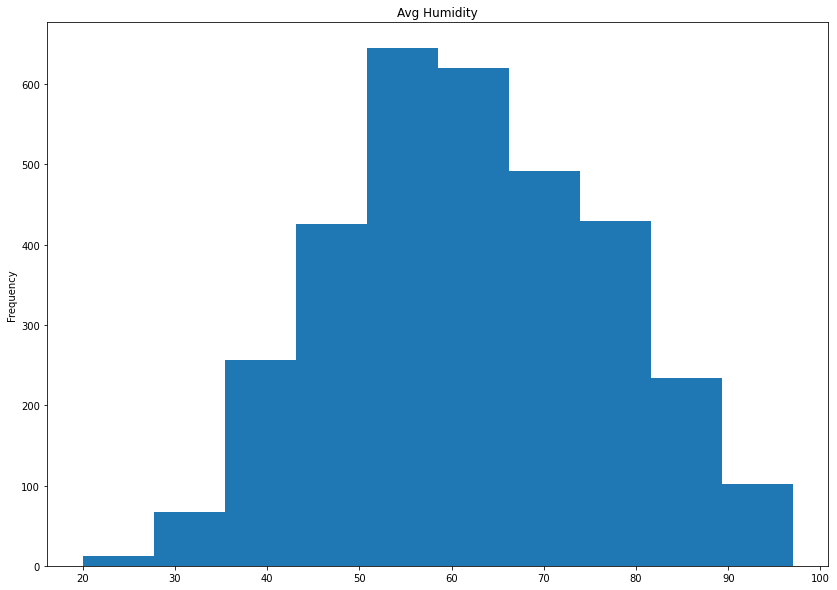

In [21]:
# If we use the .plot method we can add title and other attributes
nyc.Mean_Humidity.plot(kind='hist', title='Avg Humidity', figsize=(14, 10))

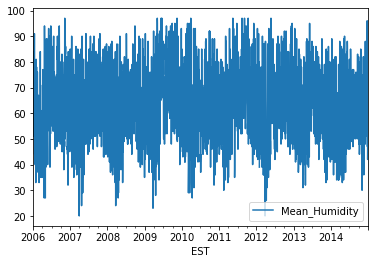

In [22]:
nyc.plot(x='EST', y='Mean_Humidity')

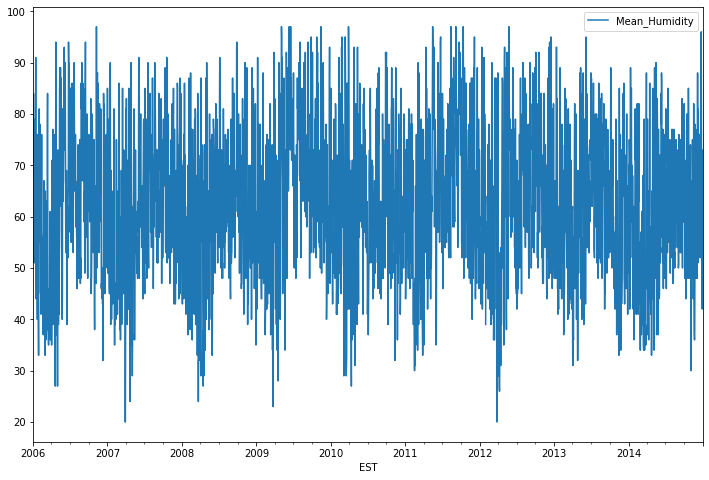

In [23]:
nyc.plot(x='EST', y='Mean_Humidity', figsize=(12, 8) )

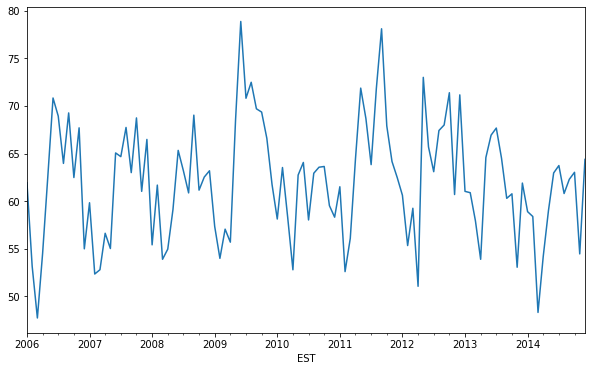

In [24]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('M').mean().plot(figsize=(10, 6)) 

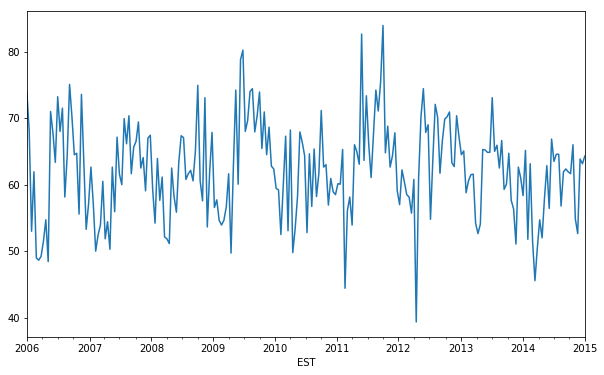

In [0]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('2W').mean().plot(figsize=(10, 6)) 

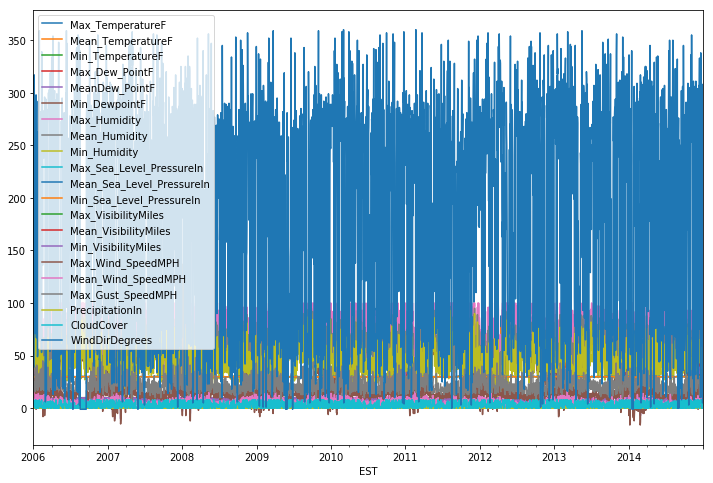

In [0]:
# Plot all the things (may be useful or just art)
nyc.set_index('EST').plot(figsize=(12,8))

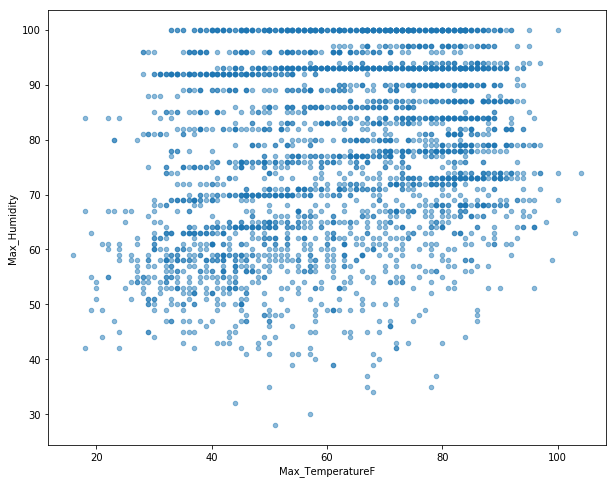

In [0]:
nyc.plot(x='Max_TemperatureF', y='Max_Humidity', kind='scatter', alpha=.5, 
        figsize=(10, 8))

In [0]:
nyc.Max_TemperatureF.corr(nyc.Max_Humidity)

0.27391561202292231

## Plotting Assignment
* Plot a histogram of air temp
* Plot a scatter plot of latitude and longitude


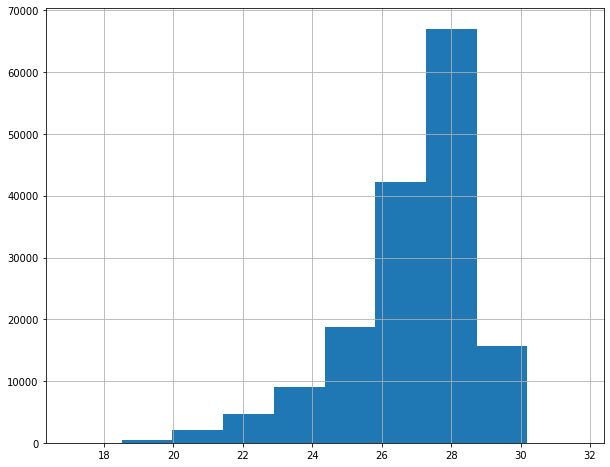

In [25]:
nino['air_temp_'].hist(figsize=(10,8))

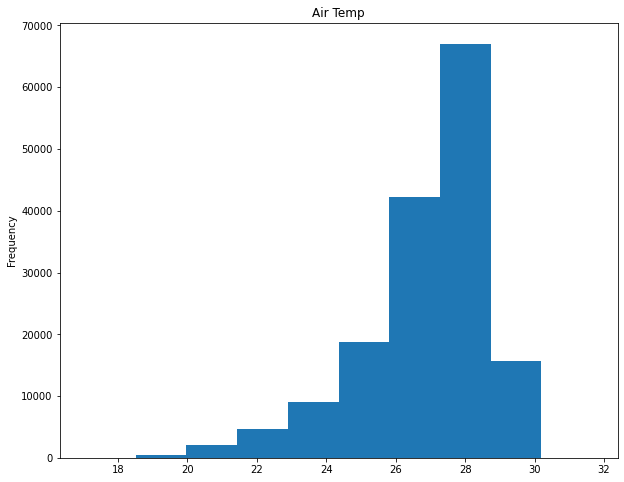

In [26]:
nino['air_temp_'].plot(kind='hist', title='Air Temp', figsize=(10,8))

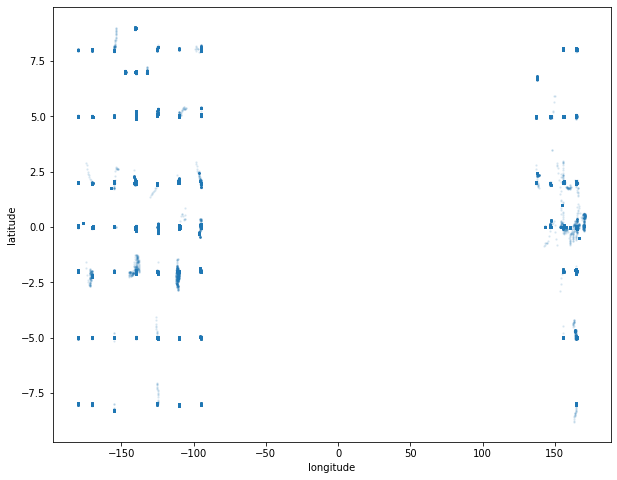

In [29]:
nino.plot(x='longitude', y='latitude', kind='scatter', figsize=(10, 8), alpha=.1,s=2)
#

TypeError: ignored

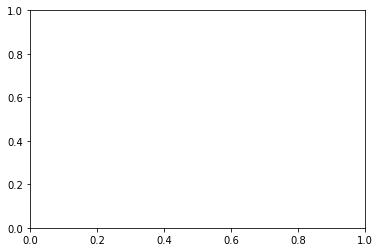

In [30]:
# try to see if we can size by air temp
nino.plot(x='longitude', y='latitude', kind='scatter', s='ait_temp_') 

In [0]:
nino['year'] = nino.year_month_day.dt.year

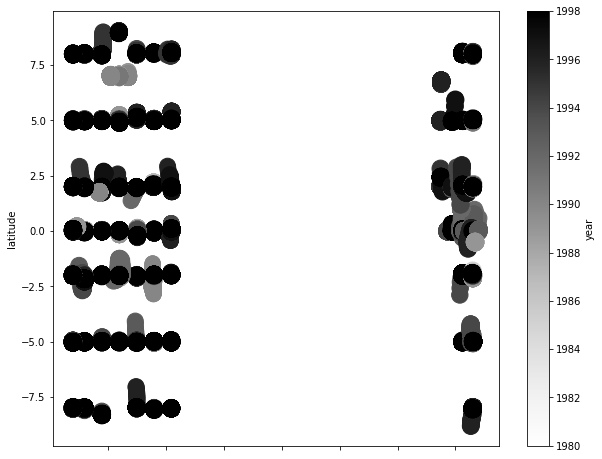

In [33]:
# whoops, need to provide an array of values
# we will also color by year
nino.plot(x='longitude', y='latitude', kind='scatter', 
          s=nino['air_temp_'].values*10, 
          c='year', 
          figsize=(10,8),
          colorbar=True)

# Filtering

In [0]:
# When we apply a conditional operator to a series we get back a series of True/False values
# We call this a "mask", which we can use to filter (similar to Photoshop)
# all EST in 2000's
m2000 = nyc.EST.dt.year >= 2000

# below 2010
lt2010 = nyc.EST.dt.year < 2010



In [35]:
# The "and" operation looks at whether the operands are truthy or falsey
# This is a case where normal Python syntax doesn't work
nyc[m2000 and lt2010]

ValueError: ignored

In [0]:
# & does bitwise comparisons - which is what we want
nyc[m2000 & lt2010]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,10.0,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,10.0,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,10.0,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0
5,2006-01-06,43.0,37.0,30.0,33.0,24.0,14.0,73.0,60.0,47.0,...,10.0,10.0,10.0,17.0,6.0,25.0,0.000,7.0,,317.0
6,2006-01-07,35.0,30.0,25.0,19.0,14.0,11.0,60.0,51.0,41.0,...,10.0,10.0,10.0,15.0,7.0,23.0,0.000,2.0,,267.0
7,2006-01-08,46.0,40.0,34.0,35.0,25.0,19.0,70.0,56.0,41.0,...,10.0,10.0,10.0,13.0,5.0,17.0,0.000,3.0,,192.0
8,2006-01-09,60.0,52.0,43.0,39.0,36.0,30.0,76.0,60.0,44.0,...,10.0,10.0,10.0,15.0,8.0,24.0,0.000,1.0,,249.0
9,2006-01-10,49.0,45.0,41.0,31.0,28.0,26.0,62.0,52.0,42.0,...,10.0,10.0,10.0,10.0,6.0,16.0,0.000,1.0,,261.0


In [36]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2009-12-27,55.0,48.0,40.0,54.0,41.0,24.0,100.0,68.0,36.0,29.89,29.84,29.77,10.0,7.0,2.0,16.0,8.0,29.0,0.330,5.0,Rain,224.0
1457,2009-12-28,43.0,37.0,30.0,33.0,21.0,14.0,73.0,59.0,44.0,29.80,29.66,29.59,10.0,10.0,10.0,18.0,9.0,29.0,0.000,4.0,,259.0
1458,2009-12-29,31.0,24.0,16.0,17.0,3.0,-3.0,58.0,47.0,36.0,30.34,30.02,29.66,10.0,10.0,10.0,29.0,14.0,40.0,0.001,1.0,,289.0
1459,2009-12-30,32.0,26.0,19.0,14.0,11.0,5.0,62.0,55.0,47.0,30.48,30.38,30.31,10.0,10.0,10.0,14.0,6.0,22.0,0.000,1.0,,249.0


In [0]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,10.0,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,10.0,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,10.0,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0
5,2006-01-06,43.0,37.0,30.0,33.0,24.0,14.0,73.0,60.0,47.0,...,10.0,10.0,10.0,17.0,6.0,25.0,0.000,7.0,,317.0
6,2006-01-07,35.0,30.0,25.0,19.0,14.0,11.0,60.0,51.0,41.0,...,10.0,10.0,10.0,15.0,7.0,23.0,0.000,2.0,,267.0
7,2006-01-08,46.0,40.0,34.0,35.0,25.0,19.0,70.0,56.0,41.0,...,10.0,10.0,10.0,13.0,5.0,17.0,0.000,3.0,,192.0
8,2006-01-09,60.0,52.0,43.0,39.0,36.0,30.0,76.0,60.0,44.0,...,10.0,10.0,10.0,15.0,8.0,24.0,0.000,1.0,,249.0
9,2006-01-10,49.0,45.0,41.0,31.0,28.0,26.0,62.0,52.0,42.0,...,10.0,10.0,10.0,10.0,6.0,16.0,0.000,1.0,,261.0


In [38]:
m_dec = nyc.EST.dt.month == 12
nyc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
334,2006-12-01,70.0,60.0,49.0,63.0,58.0,27.0,93.0,67.0,41.0,29.96,29.74,29.46,10.0,9.0,2.0,23.0,8.0,44.0,0.23,7.0,Rain,196.0
335,2006-12-02,49.0,44.0,39.0,28.0,24.0,20.0,57.0,46.0,34.0,30.38,30.13,29.84,10.0,10.0,10.0,21.0,8.0,37.0,0.00,0.0,,281.0
336,2006-12-03,46.0,41.0,35.0,29.0,23.0,19.0,57.0,47.0,36.0,30.47,30.36,30.16,10.0,10.0,10.0,13.0,5.0,20.0,0.00,0.0,,247.0
337,2006-12-04,41.0,36.0,31.0,25.0,17.0,10.0,59.0,46.0,32.0,30.17,30.10,30.01,10.0,10.0,10.0,18.0,7.0,32.0,0.00,2.0,,291.0
338,2006-12-05,37.0,33.0,29.0,18.0,13.0,10.0,53.0,44.0,35.0,30.40,30.25,30.14,10.0,10.0,10.0,17.0,6.0,26.0,0.00,2.0,,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,30.40,30.36,30.27,10.0,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0


In [39]:
# Can use loc to filter out based on index value, also takes a boolean index
# In fact, you should use .loc instead as a matter of habit (you won't see warnings)
nyc.loc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
334,2006-12-01,70.0,60.0,49.0,63.0,58.0,27.0,93.0,67.0,41.0,29.96,29.74,29.46,10.0,9.0,2.0,23.0,8.0,44.0,0.23,7.0,Rain,196.0
335,2006-12-02,49.0,44.0,39.0,28.0,24.0,20.0,57.0,46.0,34.0,30.38,30.13,29.84,10.0,10.0,10.0,21.0,8.0,37.0,0.00,0.0,,281.0
336,2006-12-03,46.0,41.0,35.0,29.0,23.0,19.0,57.0,47.0,36.0,30.47,30.36,30.16,10.0,10.0,10.0,13.0,5.0,20.0,0.00,0.0,,247.0
337,2006-12-04,41.0,36.0,31.0,25.0,17.0,10.0,59.0,46.0,32.0,30.17,30.10,30.01,10.0,10.0,10.0,18.0,7.0,32.0,0.00,2.0,,291.0
338,2006-12-05,37.0,33.0,29.0,18.0,13.0,10.0,53.0,44.0,35.0,30.40,30.25,30.14,10.0,10.0,10.0,17.0,6.0,26.0,0.00,2.0,,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,30.40,30.36,30.27,10.0,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0


In [41]:
# Can use loc to filter out based on index value, also takes a boolean index
# 2nd option in index op is column names (: to include everything)
nyc.loc[m_dec, [x for x in nyc.columns if 'Max' in x]]

,Max_TemperatureF,Max_Dew_PointF,Max_Humidity,Max_Sea_Level_PressureIn,Max_VisibilityMiles,Max_Wind_SpeedMPH,Max_Gust_SpeedMPH
334,70.0,63.0,93.0,29.96,10.0,23.0,44.0
335,49.0,28.0,57.0,30.38,10.0,21.0,37.0
336,46.0,29.0,57.0,30.47,10.0,13.0,20.0
337,41.0,25.0,59.0,30.17,10.0,18.0,32.0
338,37.0,18.0,53.0,30.40,10.0,17.0,26.0
...,...,...,...,...,...,...,...
3282,55.0,35.0,53.0,30.27,10.0,14.0,25.0
3283,54.0,43.0,92.0,30.07,10.0,15.0,22.0
3284,44.0,25.0,53.0,30.26,10.0,15.0,25.0
3285,34.0,17.0,58.0,30.40,10.0,10.0,17.0


In [0]:
# loc note:
# can use set_index and sort_index to do quick lookups (if you sort you get quick lookups)
nyc.set_index('Events').sort_index().head()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Events,,,,,,,,,,,,,,,,,,,,,
,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.0,8.0,276.0
,2011-04-29,69.0,62.0,54.0,44.0,41.0,38.0,62.0,49.0,35.0,...,29.68,10.0,10.0,10.0,16.0,7.0,23.0,0.0,4.0,262.0
,2011-04-30,67.0,59.0,50.0,41.0,37.0,33.0,64.0,48.0,31.0,...,29.92,10.0,10.0,10.0,15.0,5.0,22.0,0.0,4.0,17.0
,2011-05-01,69.0,60.0,50.0,42.0,39.0,35.0,74.0,53.0,32.0,...,30.23,10.0,10.0,10.0,13.0,5.0,18.0,0.0,0.0,133.0
,2011-05-02,63.0,57.0,50.0,50.0,45.0,39.0,83.0,72.0,60.0,...,30.13,10.0,10.0,10.0,10.0,5.0,16.0,0.0,5.0,131.0


In [43]:
(nyc
 .set_index('Events')
 .sort_index()
 .loc['Fog':'Main']
)

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Events,,,,,,,,,,,,,,,,,,,,,,
Fog,2013-01-13,50.0,47.0,43.0,49.0,44.0,42.0,100.0,93.0,86.0,30.17,30.11,30.01,10.0,4.0,0.0,12.0,3.0,18.0,0.000,8.0,160.0
Fog,2006-05-27,82.0,72.0,64.0,65.0,62.0,58.0,100.0,79.0,45.0,29.97,29.72,29.60,10.0,4.0,0.0,10.0,3.0,18.0,0.010,3.0,19.0
Fog,2009-03-02,28.0,22.0,16.0,27.0,17.0,2.0,96.0,75.0,54.0,30.08,29.91,29.83,10.0,4.0,0.0,20.0,11.0,32.0,0.490,8.0,352.0
Fog,2011-03-22,50.0,45.0,40.0,39.0,32.0,26.0,100.0,71.0,42.0,30.01,29.92,29.85,10.0,8.0,0.0,16.0,9.0,25.0,0.001,6.0,301.0
Fog,2011-05-24,81.0,74.0,66.0,70.0,64.0,59.0,100.0,76.0,51.0,29.81,29.78,29.54,10.0,6.0,0.0,13.0,5.0,18.0,0.000,5.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fog-Snow,2008-02-29,35.0,26.0,17.0,32.0,15.0,1.0,89.0,60.0,31.0,30.58,30.40,30.19,10.0,8.0,0.0,16.0,7.0,24.0,0.140,4.0,171.0
Fog-Snow,2006-02-12,28.0,26.0,23.0,27.0,20.0,10.0,96.0,76.0,55.0,29.82,29.63,29.52,10.0,3.0,0.0,25.0,12.0,38.0,1.660,7.0,339.0
Fog-Snow,2009-03-01,36.0,32.0,28.0,28.0,23.0,11.0,92.0,66.0,39.0,30.19,30.07,29.99,10.0,6.0,0.0,20.0,10.0,25.0,0.150,8.0,33.0


In [0]:
# Can use iloc to filter out based on index location (or position)
# 2nd option in index op is column indices
nyc.iloc[5:10, [2, 5, -2]]  


,Mean_TemperatureF,MeanDew_PointF,Events
5,37.0,24.0,
6,30.0,14.0,
7,40.0,25.0,
8,52.0,36.0,
9,45.0,28.0,


In [0]:
# Can use iloc to filter out based on index location
# 2nd option in index op is column indices
nyc.iloc[:, [2, 5, -2]]  


,Mean_TemperatureF,MeanDew_PointF,Events
0,37.0,30.0,
1,44.0,34.0,Rain
2,37.0,33.0,Rain
3,34.0,26.0,
4,44.0,35.0,Rain
5,37.0,24.0,
6,30.0,14.0,
7,40.0,25.0,
8,52.0,36.0,
9,45.0,28.0,


In [0]:
nyc.EST.describe()


count                    3287
unique                   3287
top       2007-09-10 00:00:00
freq                        1
first     2006-01-01 00:00:00
last      2014-12-31 00:00:00
Name: EST, dtype: object

## Filtering Assignment
* Create a mask, ``m80``, that all years >= 1980 and < 1990
* Create a mask, ``m90``, that all years >= 1990 and < 2000
* Create a mask, ``lon120``, that has all longitudes > 120
* Create a mask, ``lat0``, that has latitudes > -2 and < 2
* Create a dataframe, ``df80``, that has only those values in ``m80`` and ``lon120`` and ``lat0``
* Create a dataframe, ``df90``, that has only those values in ``m90`` and ``lon120`` and ``lat0``


In [0]:
m80 = (nino.year >= 1980) & (nino.year < 1990)
m90 = (nino.year >= 1990) & (nino.year < 2000)
lon120 = nino.longitude > 120
lat0 = (nino.latitude > -2) & (nino.latitude < 2)
df80 = nino[m80 & lon120 & lat0]
df90 = nino[m90 & lon120 & lat0]

In [0]:
df80

,year_month_day,obs,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.,year
22471,1986-04-21,22472,860421,0.05,164.99,-6.9,-1.5,NaN,28.80,NaN,1986
22472,1986-04-22,22473,860422,0.05,164.98,-6.2,-0.6,NaN,28.69,NaN,1986
22473,1986-04-23,22474,860423,0.05,164.99,-4.1,-2.5,NaN,28.54,NaN,1986
22474,1986-04-24,22475,860424,0.05,164.99,-4.7,-3.2,NaN,28.49,NaN,1986
22475,1986-04-25,22476,860425,0.04,164.99,-4.4,-0.7,NaN,28.39,NaN,1986
22476,1986-04-26,22477,860426,0.05,165.00,-5.9,1.0,NaN,28.57,NaN,1986
22477,1986-04-27,22478,860427,0.05,164.99,-5.4,1.1,NaN,28.53,NaN,1986
22478,1986-04-28,22479,860428,0.05,165.00,-3.6,-2.8,NaN,28.60,NaN,1986
22479,1986-04-29,22480,860429,0.04,164.98,-2.0,-2.5,NaN,28.29,NaN,1986
22480,1986-04-30,22481,860430,0.05,164.99,-3.5,0.5,NaN,28.65,NaN,1986


In [0]:
df90

,year_month_day,obs,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.,year
15098,1992-04-26,15099,920426,0.03,143.03,0.7,1.2,73.0,28.63,29.70,1992
15099,1992-04-27,15100,920427,0.03,143.04,-0.6,3.3,78.5,28.44,29.59,1992
15100,1992-04-28,15101,920428,0.02,143.02,-2.1,4.8,77.3,28.87,29.31,1992
15101,1992-04-29,15102,920429,0.02,143.03,-1.1,4.7,75.4,28.79,29.30,1992
15102,1992-04-30,15103,920430,0.02,143.03,-0.4,2.5,78.5,28.44,29.40,1992
15103,1992-05-01,15104,920501,0.02,143.03,-0.4,-0.2,79.3,28.40,29.55,1992
15104,1992-05-02,15105,920502,0.02,143.03,-1.7,1.9,78.5,28.55,29.59,1992
15105,1992-05-03,15106,920503,0.02,143.03,-2.4,0.8,77.7,28.75,29.54,1992
15106,1992-05-04,15107,920504,0.02,143.03,-1.5,-1.3,79.7,28.32,29.56,1992
15107,1992-05-05,15108,920505,0.02,143.03,-2.5,-0.4,81.3,28.36,29.47,1992


## Filtering Bonus Assignment
* Create a mask, ``m80_2``, that uses a function to filter years >= 1980 and < 1990
* Make sure that ``m80`` is created using operations
* Use the ``%%time`` *cell magic* to determine which is faster to calculate, ``m80`` or ``m80_2``

In [0]:
%%time
def lt1990(v):
    return v >= 1980 and v < 1990
m80_2 = nino.year.apply(lt1990)
nino[m80_2]

CPU times: user 53.6 ms, sys: 6.5 ms, total: 60.1 ms
Wall time: 58.9 ms


In [0]:
%%time
m80 = (nino.year >= 1980) & (nino.year < 1990)
nino[m80]


CPU times: user 4.78 ms, sys: 1.04 ms, total: 5.82 ms
Wall time: 5.58 ms


# Dealing with NaN

In [47]:
nyc.isna().any(axis=0)

EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
dtype: bool

In [48]:
# find rows that have null data
# fish create a mask
nyc.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [49]:
nyc[nyc.isnull().any(axis=1)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
86,2006-03-28,55.0,49.0,43.0,31.0,25.0,21.0,58.0,41.0,29.0,30.26,30.21,30.16,10.0,10.0,10.0,10.0,5.0,NaN,0.00,3.0,,93.0
87,2006-03-29,63.0,52.0,41.0,34.0,26.0,21.0,73.0,41.0,23.0,30.27,30.22,30.18,10.0,10.0,10.0,12.0,5.0,NaN,0.00,0.0,,129.0
103,2006-04-14,66.0,60.0,53.0,55.0,49.0,41.0,100.0,74.0,43.0,29.98,29.80,29.63,10.0,6.0,2.0,10.0,3.0,NaN,0.21,5.0,Rain,137.0
116,2006-04-27,73.0,60.0,48.0,37.0,32.0,28.0,59.0,37.0,21.0,29.97,29.85,29.79,10.0,10.0,10.0,8.0,5.0,NaN,0.00,2.0,,299.0
123,2006-05-04,82.0,66.0,53.0,53.0,49.0,39.0,94.0,62.0,23.0,29.91,29.83,29.72,10.0,10.0,10.0,9.0,4.0,NaN,0.00,1.0,,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2014-01-24,19.0,15.0,10.0,0.0,-4.0,-9.0,55.0,42.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2956,2014-02-04,35.0,29.0,22.0,24.0,21.0,16.0,81.0,71.0,61.0,30.47,30.38,30.27,9.0,5.0,2.0,7.0,2.0,NaN,0.00,2.0,,74.0
3049,2014-05-08,59.0,56.0,53.0,54.0,51.0,40.0,93.0,72.0,51.0,30.21,30.17,30.10,10.0,4.0,1.0,8.0,5.0,NaN,0.41,8.0,Rain,81.0
3120,2014-07-18,81.0,73.0,64.0,57.0,53.0,50.0,73.0,55.0,36.0,30.23,30.19,30.12,10.0,10.0,10.0,9.0,4.0,NaN,0.00,0.0,,44.0


In [50]:
# Find columns with null values
nyc.isnull()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3283,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3284,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3285,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# Find columns with null values
nyc.isnull().any()


EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
dtype: bool

In [0]:
missing_df = nyc.isnull() 
nyc[missing_df.Max_TemperatureF]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
2219,2012-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,,NaN
2220,2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [0]:
nyc.Max_TemperatureF.fillna(nyc.Max_TemperatureF.mean()).iloc[2219:2222]


2219    62.930898
2220    62.930898
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [0]:
# The .interpolate method will do linear interpolation by default
nyc.Max_TemperatureF.interpolate().iloc[2219:2222]


2219    47.666667
2220    51.333333
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [0]:
#dropping rows with missing data
nyc.dropna()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,10.0,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,10.0,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,10.0,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0
5,2006-01-06,43.0,37.0,30.0,33.0,24.0,14.0,73.0,60.0,47.0,...,10.0,10.0,10.0,17.0,6.0,25.0,0.000,7.0,,317.0
6,2006-01-07,35.0,30.0,25.0,19.0,14.0,11.0,60.0,51.0,41.0,...,10.0,10.0,10.0,15.0,7.0,23.0,0.000,2.0,,267.0
7,2006-01-08,46.0,40.0,34.0,35.0,25.0,19.0,70.0,56.0,41.0,...,10.0,10.0,10.0,13.0,5.0,17.0,0.000,3.0,,192.0
8,2006-01-09,60.0,52.0,43.0,39.0,36.0,30.0,76.0,60.0,44.0,...,10.0,10.0,10.0,15.0,8.0,24.0,0.000,1.0,,249.0
9,2006-01-10,49.0,45.0,41.0,31.0,28.0,26.0,62.0,52.0,42.0,...,10.0,10.0,10.0,10.0,6.0,16.0,0.000,1.0,,261.0


## Dealing with NaN Assignment
* Find the rows that have null data
* Find the columns that have null data
* It looks like the ``zon_winds`` has some missing values, use summary stats or plotting to determine how to fill in those values

In [0]:
# Rows with null data
nino.isnull().any(axis=1)


0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
178050    False
178051    False
178052    False
178053    False
178054    False
178055    False
178056    False
178057    False
178058    False
178059    False
178060    False
178061    False
178062    False
178063    False
178064    False
178065    False
178066    False
178067    False
178068    False
178069    False
178070    False
178071    False
178072    False
178073    False
178074    False
178075    False
178076    False
178077    False
178078    False
178079     True
Length: 178080, dtype: 

In [0]:
# Columns with null data
nino.isnull().any(axis=0)


year_month_day    False
date              False
latitude          False
longitude         False
zon_winds          True
mer_winds          True
humidity           True
air_temp_          True
s_s_temp_          True
air_temp_F         True
zon_winds_mph      True
mer_winds_mph      True
year              False
dtype: bool

In [0]:
nino[nino.isnull().zon_winds].shape, nino.shape

((25163, 13), (178080, 13))

In [0]:
nino.zon_winds.describe()


count    152917.000000
mean         -3.304772
std           3.373492
min         -12.400000
25%          -5.800000
50%          -4.000000
75%          -1.400000
max          14.300000
Name: zon_winds, dtype: float64

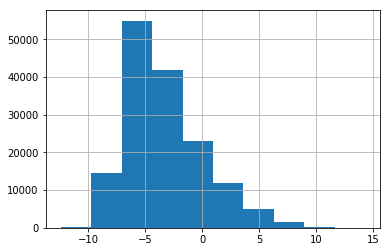

In [0]:
nino.zon_winds.hist()

In [0]:
nino[nino.isnull().zon_winds] = nino.zon_winds.median()